# Работа 1.3.1 Определение модуля Юнга на основе исследования деформаций растяжения и изгиба


### Цель работы: 
экспериментально получить зависимость между напряжением и    
деформацией (закон Гука) для двух простейших напря-   
женных состояний упругих тел: одноосного растяжения и чистого   
изгиба; по результатам измерений вычислить модуль Юнга.   

### В работе используются: 
в первой части - прибор Лермантова,   
проволока из исследуемого материала, зрительная труба со шкалой,   
набор грузов, микрометр, рулетка; во второй части - стойка для   
изгибания балки, индикатор для измерения величины прогиба, набор   
исследуемых стержней, грузы, линейка, штангенциркуль.

----


## Теория


### Определение модуля Юнга по измерениям изгиба балки

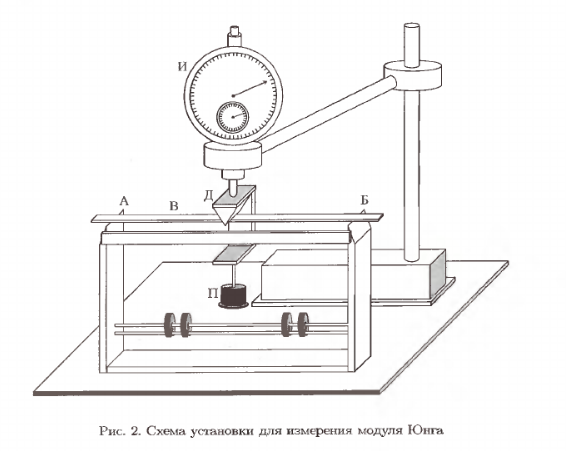

Связь модуля Юнга со стрелой прогиба $y_{max}$:
$$ E = \frac{Pl^{3}}{4ab^{3}y_{max}} $$

$P$ - сила, вызывающая прогиб, $l$ - расстояние AB, $a ~и ~b$ - ширина и высота сечения стержня

## Ход работы

### Изгиб балки 

In [25]:
import numpy as np
import matplotlib.pyplot as plt


In [26]:
def LeastSquares(x_arr, y_arr): # returns [k, b, sigma_k, sigma b]
    v = x_arr
    u = y_arr

    N = len(v)

    mu = np.mean(u) # средее
    mv = np.mean(v)
    mv2 = np.mean([v_i**2 for v_i in v]) # средний квадрат
    mu2 = np.mean([u_i**2 for u_i in u])
    muv = np.mean ([u[i] * v[i] for i in range(len(u))]) # среднее от произведения
    k = (muv - mu * mv) / (mv2 - mv**2)
    b = mu - k * mv

    sigma_k = np.sqrt(1/(N-2) * ( (mu2 - mu**2)/(mv2 - mv**2) - k**2 ) )
    sigma_b = sigma_k * np.sqrt(mv2)

    return (k, b, sigma_k, sigma_b)


In [27]:
ab = 0.504 # м между ребрами призм А и Б

iron_width = [0.0218, 0.0222, 0.0222, 0.0219, 0.0219, 0.0219, 0.0217]
iron_depth = [0.0039, 0.004, 0.0041, 0.0039, 0.0039, 0.0038, 0.0039, 0.004, 0.004, 0.0041]


In [28]:
m_platform = 0.0545 # кг
sigma_m = 0.0001
m     = [0.4723,  0.9685,  0.5035]
y_max = [0.00126, 0.00222, 0.00132]
sigma_y_max = [0.00001] * len(y_max)
m = [m_platform + m for m in m]

P = [m * 9.81 for m in m]

sigma_P = [9.81 * np.sqrt(sigma_m**2 + sigma_m**2)] * len(m)


0.00023912731752100287

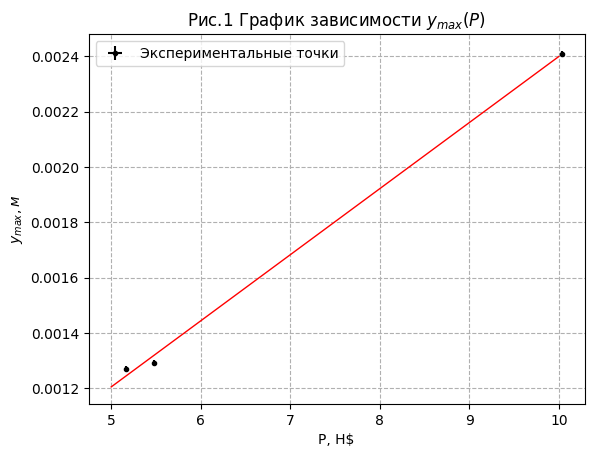

In [38]:
plt.figure(1)
plt.ylabel("$y_{max}, м$")
plt.xlabel("P, H$")
plt.title('Рис.1 График зависимости $y_{max}(P)$')
plt.grid(True, linestyle = '--')
plt.errorbar(P, y_max, xerr=sigma_P, yerr = sigma_y_max, fmt = ".k", label = "Экспериментальные точки")

k, b, kerr, berr = LeastSquares(P, y_max)
x = np.array([5, 10])
plt.plot(x, k*x + b, "-r", linewidth = 1)
plt.legend()
k


Перевернули металлическую балку


In [30]:
m     = [0.4723,  0.9685,  0.5035]
y_max = [0.00127, 0.00241, 0.00129]

m = [m_platform + m for m in m]
P = [m * 9.81 for m in m]


Деревянная балка 

In [31]:
wood_width = [0.0196, 0.0197, 0.0198, 0.0199, 0.0198, 0.0198, 0.0198, 0.02, 0.0197, 0.0199]
wood_depth = [0.011, 0.011, 0.099, 0.099, 0.01, 0.011, 0.099, 0.01, 0.01, 0.01]
np.mean(wood_width)


0.019799999999999998

ДЛя деревянной балки мерили быстро, не успел записать, данные напарника:
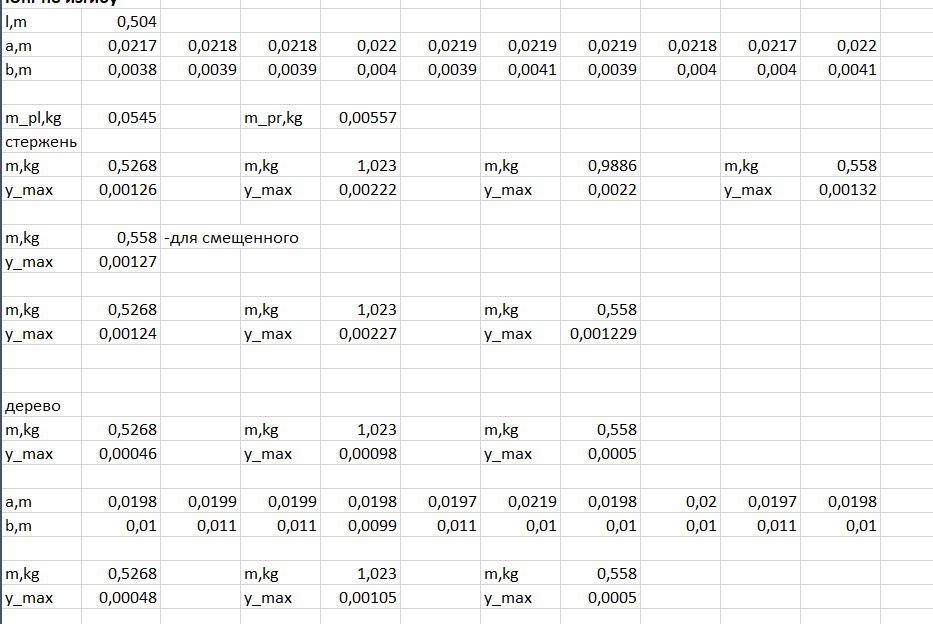